<center>
    <img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/Logos/organization_logo/organization_logo.png" width="300" alt="cognitiveclass.ai logo">
</center>


#### Import the required libraries we need for the lab.


In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [6]:
boston_df=pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv')

The following describes the dataset variables:

·      CRIM - per capita crime rate by town

·      ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

·      INDUS - proportion of non-retail business acres per town.

·      CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

·      NOX - nitric oxides concentration (parts per 10 million)

·      RM - average number of rooms per dwelling

·      AGE - proportion of owner-occupied units built prior to 1940

·      DIS - weighted distances to five Boston employment centres

·      RAD - index of accessibility to radial highways

·      TAX - full-value property-tax rate per $10,000

·      PTRATIO - pupil-teacher ratio by town

·      LSTAT - % lower status of the population

·      MEDV - Median value of owner-occupied homes in $1000's

For all visualizations, please include a title in each graph and appropriate labels

Generate the following and explain your findings:

For the "Median value of owner-occupied homes" provide a boxplot

Provide a  bar plot for the Charles river variable

Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

Create a histogram for the pupil to teacher ratio variable

For each of the following questions;

Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

Be sure to:

State your hypothesis.

Use α = 0.05

Perform the test Statistics.

State the conclusion from the test.

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [7]:
import matplotlib.pyplot as plt
import numpy as np 

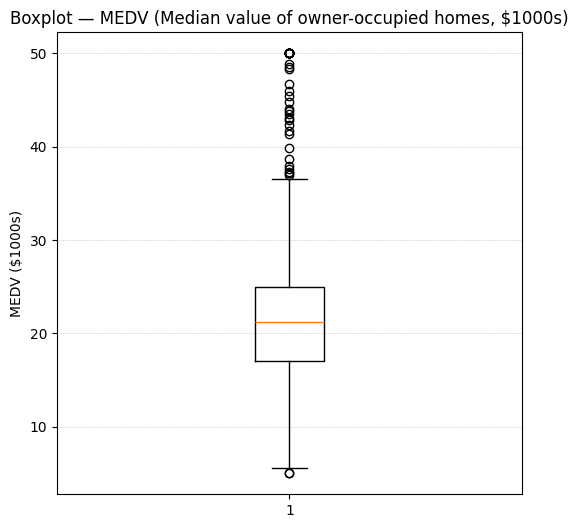

In [8]:
# A) Boxplot for MEDV
plt.figure(figsize=(6,6))
plt.boxplot(boston_df['MEDV'].dropna(), vert=True)
plt.title('Boxplot — MEDV (Median value of owner-occupied homes, $1000s)')
plt.ylabel('MEDV ($1000s)')
plt.grid(axis='y', linestyle=':', linewidth=0.5)
plt.show()

Findings: The boxplot shows that the median home value is around $21,000, with most homes priced between $17,000 and $25,000. There are many high-value outliers above $35,000, indicating a right-skewed distribution, where a few expensive homes drive prices higher.

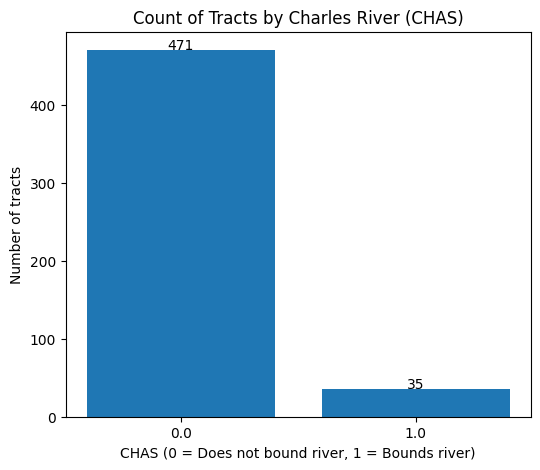

In [9]:
# B) Bar plot for CHAS (Charles River)
chas_counts = boston_df['CHAS'].value_counts().sort_index()  # expect index 0 and 1
plt.figure(figsize=(6,5))
plt.bar(chas_counts.index.astype(str), chas_counts.values)
plt.title('Count of Tracts by Charles River (CHAS)')
plt.xlabel('CHAS (0 = Does not bound river, 1 = Bounds river)')
plt.ylabel('Number of tracts')
for i, v in enumerate(chas_counts.values):
    plt.text(i, v + 1, str(v), ha='center')
plt.show()

Findings: The bar chart show that among 506 data points, only 35 of them has the value of Bounds river (=1), contributing 7% to the size of dataset

C:\Users\HOANG TUNG\AppData\Local\Temp\ipykernel_21700\673706846.py:10: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(grouped, labels=labels, vert=True)


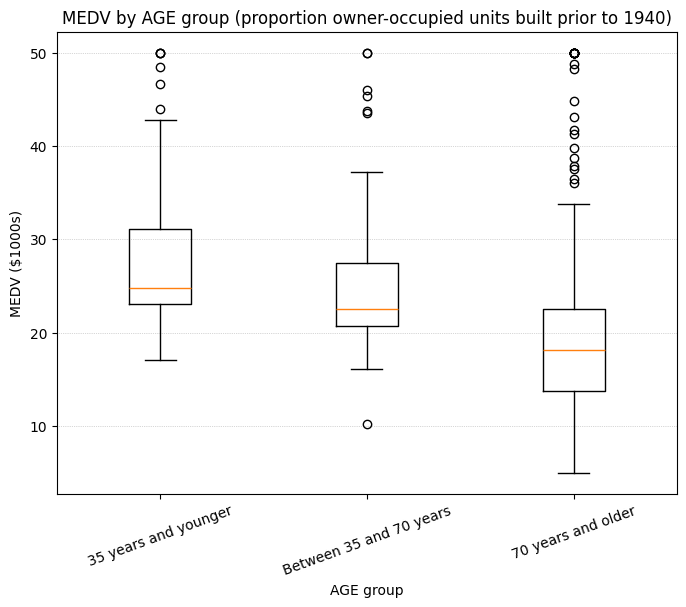

In [10]:
# C) Boxplot of MEDV vs AGE groups (discretize AGE into three groups)
# create bins: <=35, 35-70, >70  (edge inclusions: match user's wording)
bins = [-np.inf, 35, 70, np.inf]
labels = ['35 years and younger','Between 35 and 70 years','70 years and older']
boston_df['AGE_group'] = pd.cut(boston_df['AGE'], bins=bins, labels=labels, right=True)

# Prepare data for boxplot in correct order
grouped = [boston_df.loc[boston_df['AGE_group']==lab, 'MEDV'].dropna() for lab in labels]
plt.figure(figsize=(8,6))
plt.boxplot(grouped, labels=labels, vert=True)
plt.title('MEDV by AGE group (proportion owner-occupied units built prior to 1940)')
plt.ylabel('MEDV ($1000s)')
plt.xlabel('AGE group')
plt.xticks(rotation=20)
plt.grid(axis='y', linestyle=':', linewidth=0.5)
plt.show()

Findings: The boxplot shows that newer homes (≤35 years) generally have the highest median values, while older homes (≥70 years) have the lowest median values. Homes between 35–70 years fall in between. This suggests that newer housing areas tend to be more valuable, whereas very old neighborhoods are less valuable on average.

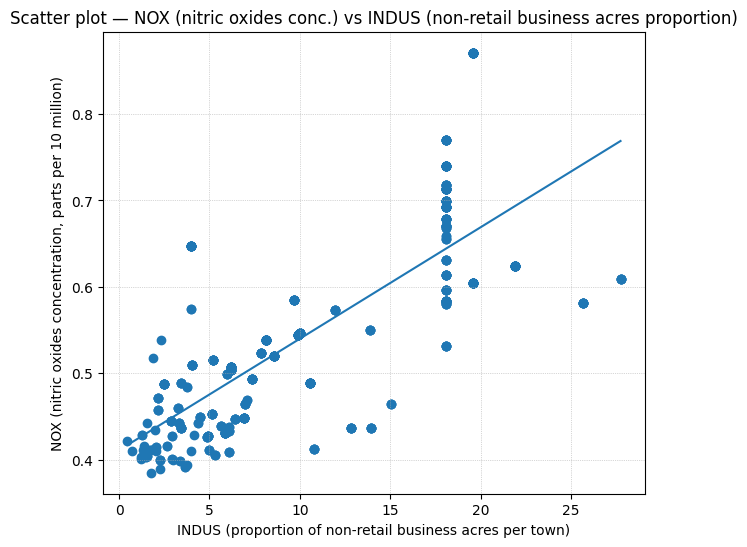

In [11]:
# D) Scatter plot NOX vs INDUS
plt.figure(figsize=(7,6))
plt.scatter(boston_df['INDUS'], boston_df['NOX'])
plt.title('Scatter plot — NOX (nitric oxides conc.) vs INDUS (non-retail business acres proportion)')
plt.xlabel('INDUS (proportion of non-retail business acres per town)')
plt.ylabel('NOX (nitric oxides concentration, parts per 10 million)')
plt.grid(True, linestyle=':', linewidth=0.5)
# optional: show a linear fit line
m, b = np.polyfit(boston_df['INDUS'], boston_df['NOX'], 1)
x_vals = np.array([boston_df['INDUS'].min(), boston_df['INDUS'].max()])
plt.plot(x_vals, m*x_vals + b)
plt.show()


Findings: The scatter plot shows a positive relationship: as the proportion of non-retail business acres (INDUS) increases, nitric oxide concentration (NOX) also tends to rise. This suggests that more industrial/commercial land use is associated with higher pollution levels.

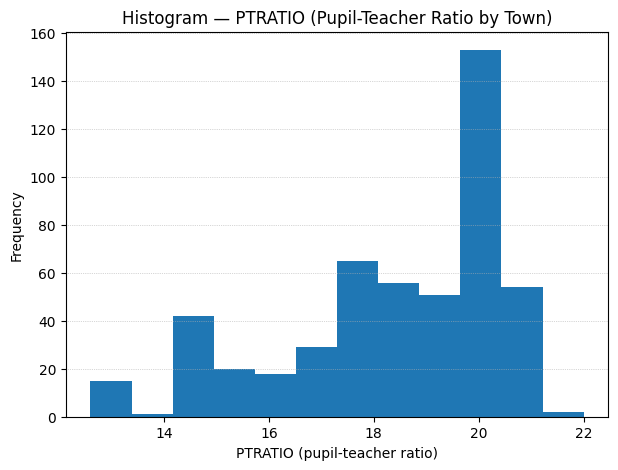

In [12]:
# E) Histogram for PTRATIO
plt.figure(figsize=(7,5))
plt.hist(boston_df['PTRATIO'].dropna(), bins=12)
plt.title('Histogram — PTRATIO (Pupil-Teacher Ratio by Town)')
plt.xlabel('PTRATIO (pupil-teacher ratio)')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle=':', linewidth=0.5)
plt.show()

Findings: The histogram shows that most towns have a pupil–teacher ratio between 18 and 21, with a strong peak around 20. This indicates that class sizes are relatively similar across towns, with fewer towns having very low or very high ratios.

In [13]:
alpha = 0.05

H1: There is a significant difference in median value of houses bounded by the Charles river.

H0: There is no significant difference in median value of houses bounded by the Charles river

In [14]:
# 1) T-test: Is there a significant difference in median value of houses bounded by the Charles river?
#    We'll do a two-sample t-test (independent samples). Check assumptions: reasonably normal-ish or large enough samples.
medv_chas1 = boston_df.loc[boston_df['CHAS']==1, 'MEDV'].dropna()
medv_chas0 = boston_df.loc[boston_df['CHAS']==0, 'MEDV'].dropna()

print("\nT-test for MEDV between CHAS=1 and CHAS=0")
print("N (chas=1):", len(medv_chas1), "mean:", medv_chas1.mean(), "std:", medv_chas1.std())
print("N (chas=0):", len(medv_chas0), "mean:", medv_chas0.mean(), "std:", medv_chas0.std())

# Hypotheses:
# H0: mu_CHAS1 = mu_CHAS0  (no difference in mean MEDV)
# Ha: mu_CHAS1 != mu_CHAS0
t_res = stats.ttest_ind(medv_chas1, medv_chas0, equal_var=False)  # Welch's t-test
print("t-statistic = {:.4f}, p-value = {:.4f}".format(t_res.statistic, t_res.pvalue))
if t_res.pvalue < alpha:
    print("Conclusion: Reject H0 at alpha=0.05. There is a statistically significant difference in MEDV between CHAS groups.")
else:
    print("Conclusion: Fail to reject H0 at alpha=0.05. No statistically significant difference in MEDV between CHAS groups.")


T-test for MEDV between CHAS=1 and CHAS=0
N (chas=1): 35 mean: 28.439999999999998 std: 11.816643297634458
N (chas=0): 471 mean: 22.093842887473464 std: 8.831362409577908
t-statistic = 3.1133, p-value = 0.0036
Conclusion: Reject H0 at alpha=0.05. There is a statistically significant difference in MEDV between CHAS groups.


(H₀):There is no difference in the mean (or median, if using non-parametric) house values (MEDV) across the groups of AGE.

(H₁):There is a significant difference in house values (MEDV) among at least one of the AGE groups.

In [15]:
# 2) ANOVA: Is there a difference in MEDV for each AGE group?
#    We'll do one-way ANOVA across the 3 AGE groups created earlier.
age_groups_samples = [g.dropna() for g in grouped]  # grouped from above (list of Series)
print("\nOne-way ANOVA for MEDV across AGE groups")
# Hypotheses:
# H0: all group means are equal
# Ha: at least one group mean differs
f_stat, p_val = stats.f_oneway(*age_groups_samples)
print("F-statistic = {:.4f}, p-value = {:.4f}".format(f_stat, p_val))
if p_val < alpha:
    print("Conclusion: Reject H0 at alpha=0.05. There is a significant difference in MEDV across AGE groups.")
else:
    print("Conclusion: Fail to reject H0 at alpha=0.05. No evidence MEDV differs across AGE groups.")

# If ANOVA significant, do pairwise tests (Tukey HSD)
if p_val < alpha:
    import statsmodels.stats.multicomp as mc
    df_anova = boston_df[['MEDV','AGE_group']].dropna()
    tukey = mc.pairwise_tukeyhsd(df_anova['MEDV'], df_anova['AGE_group'])
    print("\nTukey HSD results (pairwise comparisons):")
    print(tukey.summary())
else:
    print("ANOVA not significant — skipping Tukey HSD.")


One-way ANOVA for MEDV across AGE groups
F-statistic = 36.4076, p-value = 0.0000
Conclusion: Reject H0 at alpha=0.05. There is a significant difference in MEDV across AGE groups.

Tukey HSD results (pairwise comparisons):
                Multiple Comparison of Means - Tukey HSD, FWER=0.05                 
       group1                 group2         meandiff p-adj   lower    upper  reject
------------------------------------------------------------------------------------
35 years and younger      70 years and older  -7.9824    0.0 -10.4182 -5.5467   True
35 years and younger Between 35 and 70 years  -2.8282 0.0447  -5.6043  -0.052   True
  70 years and older Between 35 and 70 years   5.1543    0.0   3.0024  7.3062   True
------------------------------------------------------------------------------------


(H₀):There is no relationship between nitric oxide concentrations (NOX) and the proportion of non-retail business acres per town (INDUS).

(H₁):There is a relationship between nitric oxide concentrations (NOX) and the proportion of non-retail business acres per town (INDUS).

In [16]:
# 3) Pearson correlation between NOX and INDUS
print("\nPearson correlation between NOX and INDUS")
# Hypotheses:
# H0: rho = 0 (no linear relationship)
# Ha: rho != 0
pearson_r, pearson_p = stats.pearsonr(boston_df['NOX'].dropna(), boston_df['INDUS'].dropna())
print("Pearson r = {:.4f}, p-value = {:.4f}".format(pearson_r, pearson_p))
if pearson_p < alpha:
    print("Conclusion: Reject H0 at alpha=0.05. There is evidence of a linear relationship between NOX and INDUS.")
else:
    print("Conclusion: Fail to reject H0 at alpha=0.05. No evidence of a linear relationship between NOX and INDUS.")


Pearson correlation between NOX and INDUS
Pearson r = 0.7637, p-value = 0.0000
Conclusion: Reject H0 at alpha=0.05. There is evidence of a linear relationship between NOX and INDUS.


(H₀):There is no relationship between weighted distance to employment centres (DIS) and the median value of owner-occupied homes (MEDV).

(H₁):There is a relationship between weighted distance to employment centres (DIS) and the median value of owner-occupied homes (MEDV).

In [17]:
# 4) Regression: Impact of DIS (weighted distances) on MEDV
#    Simple linear regression: MEDV ~ DIS
print("\nOLS Regression: MEDV ~ DIS (weighted distances to employment centres)")
# Hypotheses for slope (beta_DIS):
# H0: beta_DIS = 0 (no effect)
# Ha: beta_DIS != 0
df_reg = boston_df[['MEDV','DIS']].dropna()
X = sm.add_constant(df_reg['DIS'])  # adds intercept
y = df_reg['MEDV']
model = sm.OLS(y, X).fit()
print(model.summary())

beta = model.params['DIS']
se_beta = model.bse['DIS']
t_beta = model.tvalues['DIS']
p_beta = model.pvalues['DIS']
print("\nInterpretation:")
print("Estimated effect: each additional unit of DIS is associated with change in MEDV = {:.4f} (in $1000s).".format(beta))
if p_beta < alpha:
    print("The slope is statistically significant (p = {:.4f}) -> reject H0: DIS affects MEDV.".format(p_beta))
else:
    print("The slope is NOT statistically significant (p = {:.4f}) -> fail to reject H0: no evidence DIS affects MEDV.".format(p_beta))

# Optionally compute R-squared and explain (already in summary)
print("\nModel fit: R-squared = {:.4f}".format(model.rsquared))
print("This R-squared is the fraction of variance in MEDV explained by DIS in this simple model.")


OLS Regression: MEDV ~ DIS (weighted distances to employment centres)
                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Mon, 29 Sep 2025   Prob (F-statistic):           1.21e-08
Time:                        17:54:28   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------